# Experimentando Preenchimento de cantos vazios devido a rotações

## Importando bibliotecas

In [1]:
import numpy as np
import seaborn as sns

from zipfile import ZipFile
from matplotlib import pyplot as plt
from skimage.io import imread

from img_edit import best_rgb, rgb_to_color, auto_rotate, fill_empty_edges

sns.set_style(style='darkgrid')
plt.gray()

LIMITE_DE_NORMALIZACAO = 8

COLOR_NAMES = ['vermelho', 'verde', 'azul']
COLOR_CODES = ['r-', 'g-', 'b-', 'brown-', 'orange-']

<Figure size 432x288 with 0 Axes>

In [2]:
path_list = []
with ZipFile('./toras.zip') as zip_file:
  for path in zip_file.namelist():
    if '__MAC' not in path \
        and '.JPG' in path:
      path_list.append(f'./toras.zip/{path}')

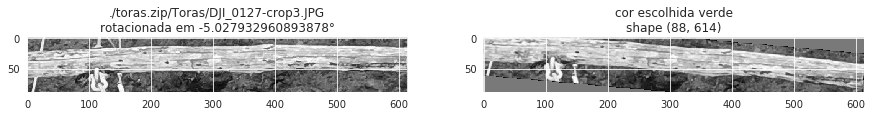

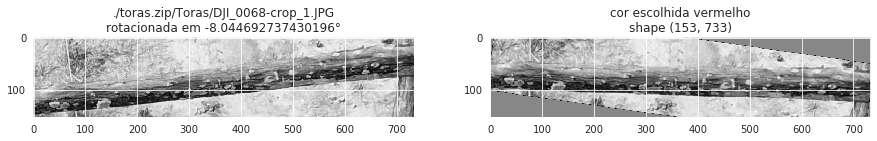

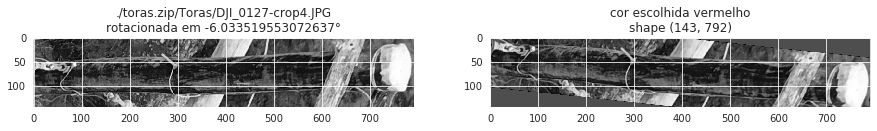

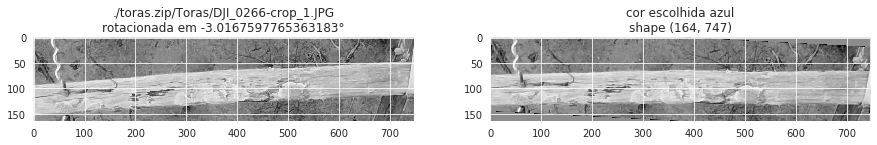

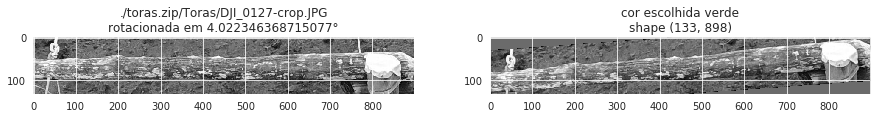

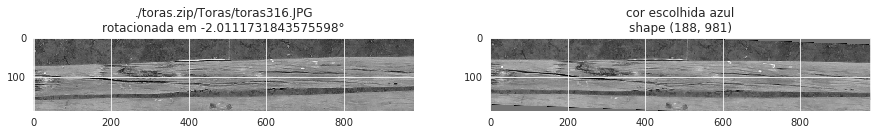

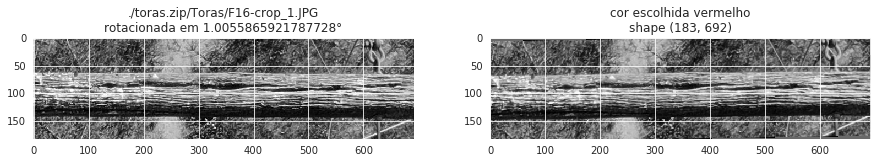

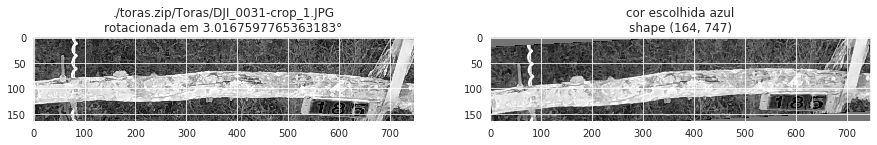

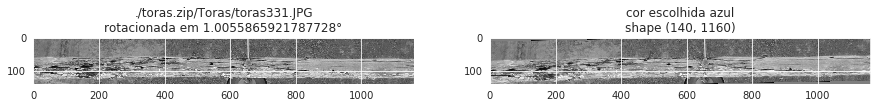

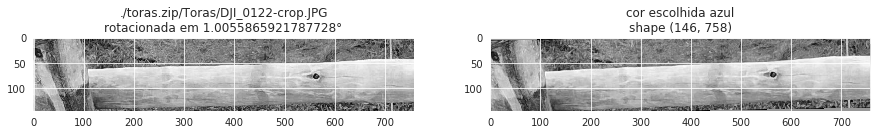

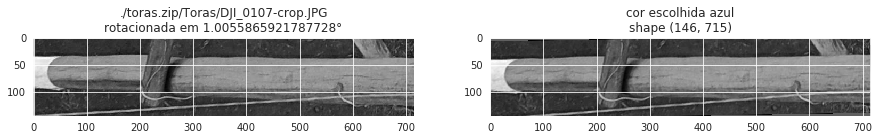

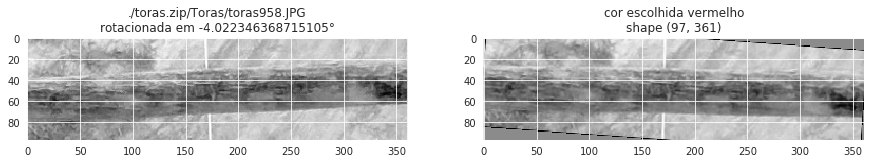

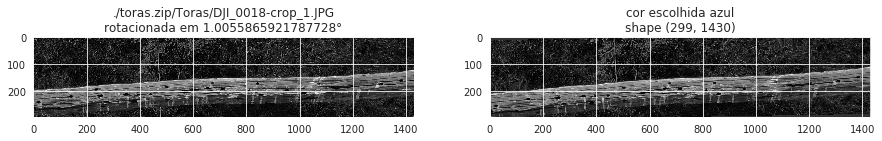

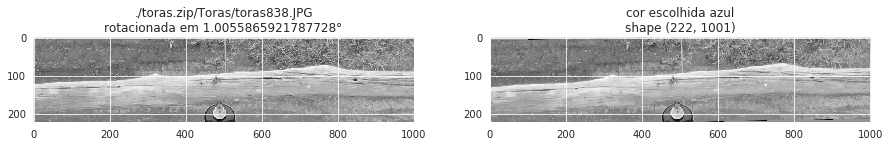

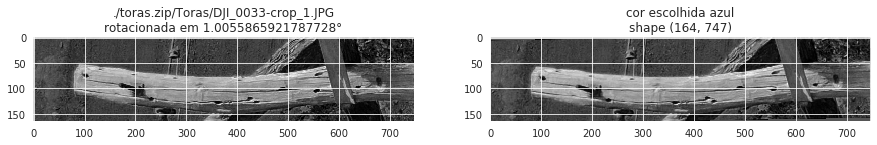

In [3]:
for path in path_list:
  # lendo imagem RGB
  img = imread(path)

  # Escolhendo qual cor apresenta maior variação
  cor_v, cor_h = best_rgb(img)

  # somas verticais e horizontais
  new_img = rgb_to_color(img, cor_h)
  rot_img, angle = auto_rotate(new_img)

  if angle != 0:
    filled_img = fill_empty_edges(rot_img)
    h, w = new_img.shape

    # Plotando imagens
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

    # Exibindo imagem da cor selecionada
    ax[0].title.set_text(f'{path}\nrotacionada em {angle}°')
    ax[0].imshow(new_img)
    
    ax[1].title.set_text(f'cor escolhida {COLOR_NAMES[cor_h]}\nshape {new_img.shape}')
    ax[1].imshow(filled_img)

    soma_horizontal = new_img.sum(axis=1)
    soma_normalizada = soma_horizontal * (LIMITE_DE_NORMALIZACAO - 1)/soma_horizontal.max()


    plt.show()
